**Data processing for MNIST dataset**

In [ ]:
import pickle
import gzip
import numpy as np
import tensorflow as tf

def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')  # unzip and open
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1") 
    # training_data : a tuple with 2 entries 1. (28*28 * 50,000) / 2. right difits between (0,9) for the corresponding images
    # validation_data : similar but contains only 10,000 images 
    # test_data : similar but contains only 10,000 images
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    tr_d, va_d, te_d = load_data()

    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    # e.g.) (0,0,0,0,0,1,0,0,0,0) --> 5
    # e.g.) (0,0,0,0,0,0,0,0,0,1) --> 9
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [ ]:
training, validation, test = load_data()
training2, validation2, test2 = load_data_wrapper()

In [ ]:
print(training[0].shape)
print(type(training[0]))
print(training[1].shape)
print(type(training[1]))
print()

(50000, 784)
<class 'numpy.ndarray'>
(50000,)
<class 'numpy.ndarray'>



In [ ]:
training_data = list(training2)
test_data = list(test2)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models, initializers
model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 7s 3ms/step - loss: 0.9789 - accuracy: 0.7763 - val_loss: 0.4238 - val_accuracy: 0.9006
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3444 - accuracy: 0.9106 - val_loss: 0.2750 - val_accuracy: 0.9242
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2551 - accuracy: 0.9290 - val_loss: 0.2317 - val_accuracy: 0.9357
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2147 - accuracy: 0.9387 - val_loss: 0.2041 - val_accuracy: 0.9403
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1885 - accuracy: 0.9458 - val_loss: 0.1921 - val_accuracy: 0.9433
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1693 - accuracy: 0.9511 - val_loss: 0.1810 - val_accuracy: 0.9462
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9555 - val_loss: 0.1754 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1413 - accuracy: 0.9565
0.14132174849510193
0.9564999938011169


[0.7763000130653381, 0.9105799794197083, 0.9290000200271606, 0.9387000203132629, 0.9458400011062622, 0.9511399865150452, 0.9554799795150757, 0.9591799974441528, 0.9618600010871887, 0.9647200107574463, 0.9667400121688843, 0.9681599736213684, 0.9703400135040283, 0.9716600179672241, 0.9732599854469299]
[0.900600016117096, 0.9241999983787537, 0.935699999332428, 0.9402999877929688, 0.9433000087738037, 0.9462000131607056, 0.9484999775886536, 0.95169997215271, 0.9528999924659729, 0.9559000134468079, 0.9557999968528748, 0.9562000036239624, 0.95660001039505, 0.955299973487854, 0.9564999938011169]
[0.9788987636566162, 0.3444044589996338, 0.25509151816368103, 0.21471098065376282, 0.18853501975536346, 0.1693187952041626, 0.15390042960643768, 0.1425269991159439, 0.13225270807743073, 0.12342530488967896, 0.11615404486656189, 0.11013736575841904, 0.10379672795534134, 0.09881366044282913, 0.09372591972351074]
[0.4237980842590332, 0.2749943137168884, 0.23174045979976654, 0.2040635049343109, 0.192115217

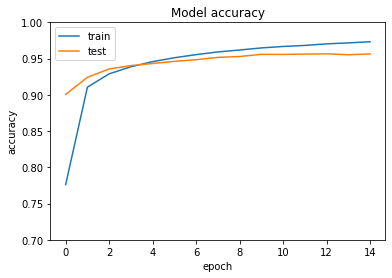

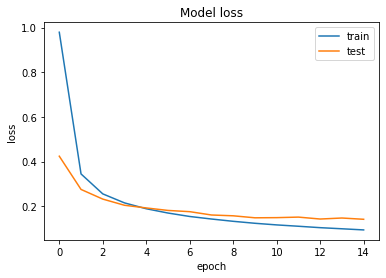

In [ ]:
import matplotlib.pyplot as plt

print(history.history['accuracy'])
print(history.history['val_accuracy'])

print(history.history['loss'])
print(history.history['val_loss'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 6s 3ms/step - loss: 0.6957 - accuracy: 0.8299 - val_loss: 0.2946 - val_accuracy: 0.9193
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2496 - accuracy: 0.9283 - val_loss: 0.2071 - val_accuracy: 0.9407
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1837 - accuracy: 0.9466 - val_loss: 0.1669 - val_accuracy: 0.9514
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1446 - accuracy: 0.9574 - val_loss: 0.1410 - val_accuracy: 0.9579
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1184 - accuracy: 0.9654 - val_loss: 0.1278 - val_accuracy: 0.9629
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0993 - accuracy: 0.9709 - val_loss: 0.1192 - val_accuracy: 0.9647
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0856 - accuracy: 0.9751 - val_loss: 0.1116 - val_accuracy:

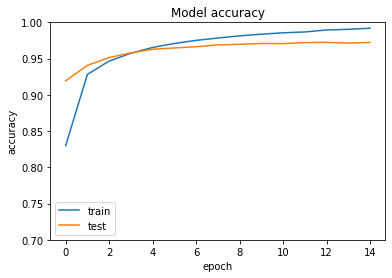

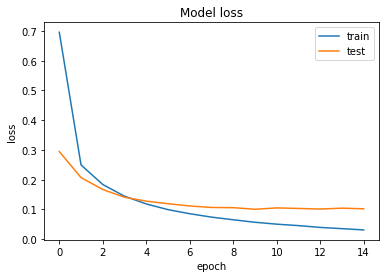

In [ ]:
# trying different number of hidden UNIT

model = models.Sequential()

model.add(layers.Dense(50, activation='sigmoid'))
model.add(layers.Dense(50, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5074 - accuracy: 0.8672 - val_loss: 0.2283 - val_accuracy: 0.9325
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1958 - accuracy: 0.9416 - val_loss: 0.1699 - val_accuracy: 0.9472
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1408 - accuracy: 0.9575 - val_loss: 0.1349 - val_accuracy: 0.9590
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1084 - accuracy: 0.9683 - val_loss: 0.1077 - val_accuracy: 0.9649
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0853 - accuracy: 0.9748 - val_loss: 0.1012 - val_accuracy: 0.9686
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0695 - accuracy: 0.9800 - val_loss: 0.0888 - val_accuracy: 0.9727
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0566 - accuracy: 0.9834 - val_loss: 0.0862 - val_accuracy:

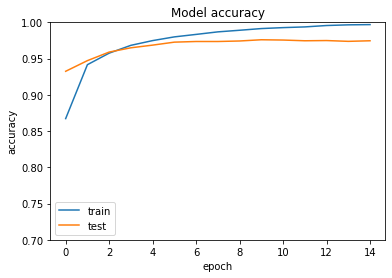

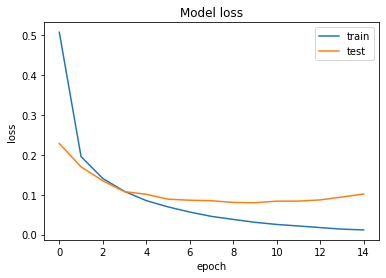

In [ ]:
# trying different number of hidden UNIT

model = models.Sequential()

model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4030 - accuracy: 0.8859 - val_loss: 0.2019 - val_accuracy: 0.9391
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1730 - accuracy: 0.9473 - val_loss: 0.1388 - val_accuracy: 0.9579
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1179 - accuracy: 0.9636 - val_loss: 0.1150 - val_accuracy: 0.9640
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0843 - accuracy: 0.9737 - val_loss: 0.0907 - val_accuracy: 0.9714
Epoch 5/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0809 - val_accuracy: 0.9753
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0800 - val_accuracy: 0.9746
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0767 - val_accuracy:

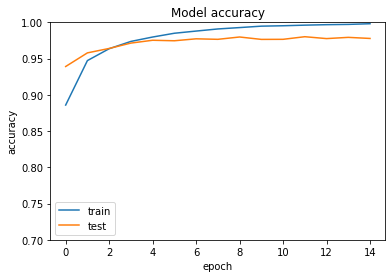

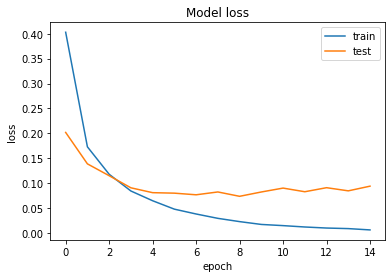

In [ ]:
# trying different number of hidden UNIT

model = models.Sequential()

model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3423 - accuracy: 0.5712 - val_loss: 0.6907 - val_accuracy: 0.7897
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5704 - accuracy: 0.8280 - val_loss: 0.4549 - val_accuracy: 0.8655
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4190 - accuracy: 0.8751 - val_loss: 0.3695 - val_accuracy: 0.8924
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3497 - accuracy: 0.8969 - val_loss: 0.3231 - val_accuracy: 0.9078
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3067 - accuracy: 0.9100 - val_loss: 0.2969 - val_accuracy: 0.9160
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2772 - accuracy: 0.9187 - val_loss: 0.2772 - val_accuracy: 0.9198
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2551 - accuracy: 0.9256 - val_loss: 0.2655 - val_accuracy:

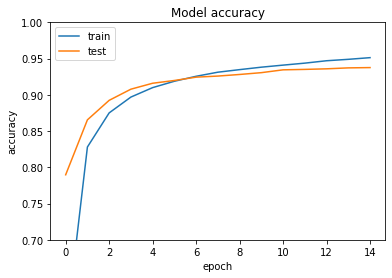

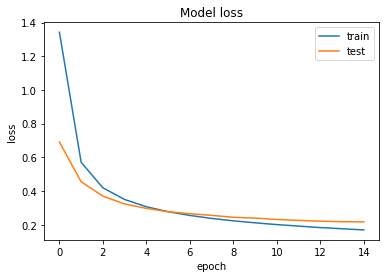

In [ ]:
# different weight/bias initializations
# weight: randomNormal
# bias: zeros
initializer = initializers.RandomNormal(mean=0., stddev=1.)

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0897 - accuracy: 0.1780 - val_loss: 1.9342 - val_accuracy: 0.2264
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8809 - accuracy: 0.2477 - val_loss: 1.8328 - val_accuracy: 0.2690
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7431 - accuracy: 0.3276 - val_loss: 1.6501 - val_accuracy: 0.3596
Epoch 4/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5744 - accuracy: 0.3616 - val_loss: 1.5254 - val_accuracy: 0.3795
Epoch 5/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4814 - accuracy: 0.3805 - val_loss: 1.4579 - val_accuracy: 0.3832
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4285 - accuracy: 0.3934 - val_loss: 1.4171 - val_accuracy: 0.3965
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3923 - accuracy: 0.4123 - val_loss: 1.3915 - val_accuracy:

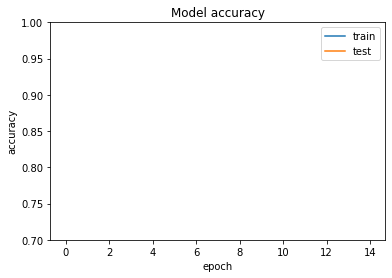

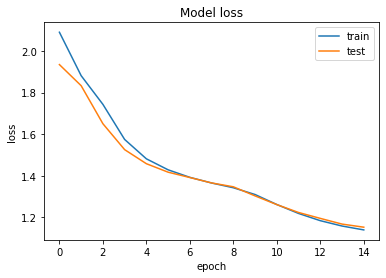

In [ ]:
# different weight/bias initializations
# weight: randomUniform
# bias: zeros
initializer = initializers.RandomUniform(minval=0.05, maxval=0.05, seed=None)

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2500 - accuracy: 0.6311 - val_loss: 0.6186 - val_accuracy: 0.8497
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4715 - accuracy: 0.8831 - val_loss: 0.3685 - val_accuracy: 0.9089
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3196 - accuracy: 0.9177 - val_loss: 0.2815 - val_accuracy: 0.9251
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2547 - accuracy: 0.9317 - val_loss: 0.2428 - val_accuracy: 0.9323
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2180 - accuracy: 0.9397 - val_loss: 0.2180 - val_accuracy: 0.9408
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1931 - accuracy: 0.9467 - val_loss: 0.1991 - val_accuracy: 0.9437
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1745 - accuracy: 0.9514 - val_loss: 0.1897 - val_accuracy:

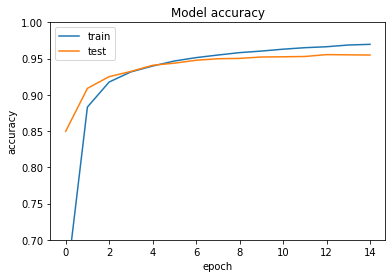

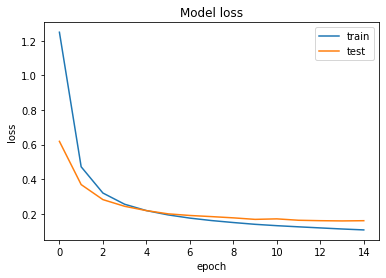

In [ ]:
# different weight/bias initializations
# weight: TruncatedNormal
# bias: zeros
initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0773 - accuracy: 0.1526 - val_loss: 1.8809 - val_accuracy: 0.2021
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8213 - accuracy: 0.2065 - val_loss: 1.7823 - val_accuracy: 0.2158
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7610 - accuracy: 0.2497 - val_loss: 1.7320 - val_accuracy: 0.2792
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6846 - accuracy: 0.3003 - val_loss: 1.6380 - val_accuracy: 0.2985
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5983 - accuracy: 0.3129 - val_loss: 1.5694 - val_accuracy: 0.3176
Epoch 6/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5392 - accuracy: 0.3308 - val_loss: 1.5143 - val_accuracy: 0.3570
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4652 - accuracy: 0.3876 - val_loss: 1.4317 - val_accuracy:

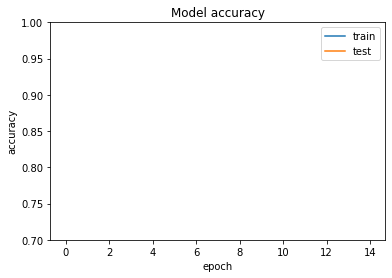

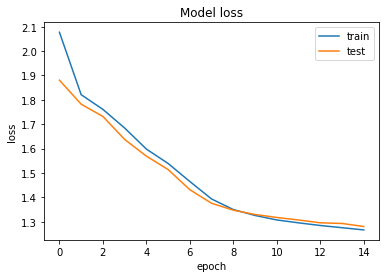

In [ ]:
# different weight/bias initializations
# weight: zeros
# bias: zeros
initializer = initializers.Zeros()

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3045 - accuracy: 0.1054 - val_loss: 2.3030 - val_accuracy: 0.0982
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3051 - accuracy: 0.1070 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3043 - accuracy: 0.1096 - val_loss: 2.3042 - val_accuracy: 0.1135
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3043 - accuracy: 0.1058 - val_loss: 2.3058 - val_accuracy: 0.1135
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3044 - accuracy: 0.1083 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3044 - accuracy: 0.1074 - val_loss: 2.3063 - val_accuracy: 0.1010
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3045 - accuracy: 0.1060 - val_loss: 2.3067 - val_accuracy:

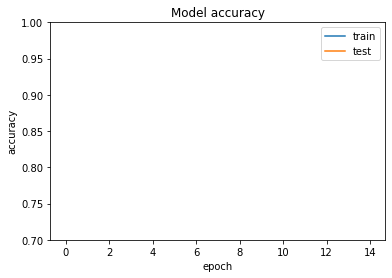

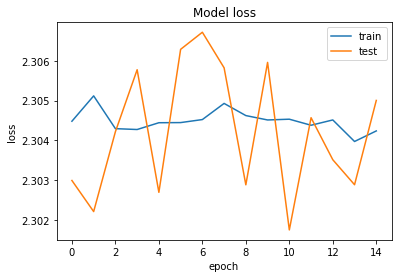

In [ ]:
# different weight/bias initializations
# weight: Ones
# bias: zeros
initializer = initializers.Ones()

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9201 - accuracy: 0.8091 - val_loss: 0.3867 - val_accuracy: 0.9067
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3194 - accuracy: 0.9161 - val_loss: 0.2599 - val_accuracy: 0.9270
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2408 - accuracy: 0.9319 - val_loss: 0.2214 - val_accuracy: 0.9354
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2034 - accuracy: 0.9419 - val_loss: 0.1938 - val_accuracy: 0.9416
Epoch 5/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1796 - accuracy: 0.9482 - val_loss: 0.1805 - val_accuracy: 0.9464
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1616 - accuracy: 0.9526 - val_loss: 0.1714 - val_accuracy: 0.9485
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1484 - accuracy: 0.9571 - val_loss: 0.1653 - val_accuracy:

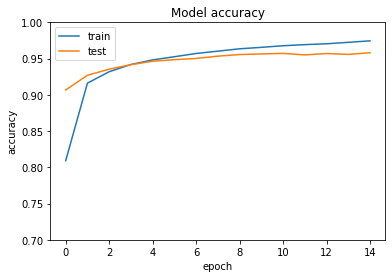

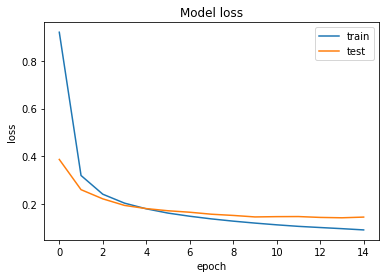

In [ ]:
# different weight/bias initializations
# weight: HeNormal
# bias: zeros
initializer = initializers.HeNormal()

model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(25, activation='sigmoid', kernel_initializer=initializer))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# different weight/bias initializations
# weight: HeUniform() , Identity(gain=1.0), Orthogonal(gain=1.0)
# https://keras.io/api/layers/initializers/
# bias: zeros

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6869 - accuracy: 0.8489 - val_loss: 0.3429 - val_accuracy: 0.9130
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3053 - accuracy: 0.9167 - val_loss: 0.2612 - val_accuracy: 0.9262
Epoch 3/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.2480 - accuracy: 0.9288 - val_loss: 0.2309 - val_accuracy: 0.9329
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2186 - accuracy: 0.9369 - val_loss: 0.2111 - val_accuracy: 0.9380
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1984 - accuracy: 0.9431 - val_loss: 0.1994 - val_accuracy: 0.9412
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1835 - accuracy: 0.9467 - val_loss: 0.1912 - val_accuracy: 0.9443
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1715 - accuracy: 0.9501 - val_loss: 0.1818 - val_accuracy

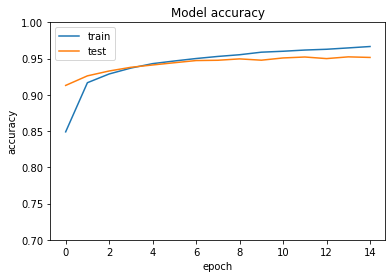

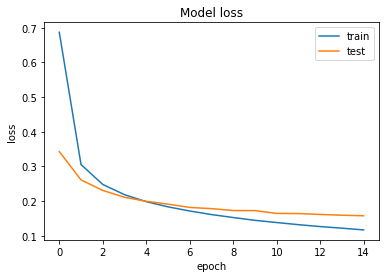

In [ ]:
# trying different number of hidden layer
# 1 hidden layer 

model = models.Sequential()

# 1 hidden layer
model.add(layers.Dense(25, activation='sigmoid'))
# model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1889 - accuracy: 0.6768 - val_loss: 0.4803 - val_accuracy: 0.8853
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3759 - accuracy: 0.9016 - val_loss: 0.3022 - val_accuracy: 0.9192
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2727 - accuracy: 0.9250 - val_loss: 0.2422 - val_accuracy: 0.9327
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2254 - accuracy: 0.9373 - val_loss: 0.2152 - val_accuracy: 0.9398
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1948 - accuracy: 0.9451 - val_loss: 0.1973 - val_accuracy: 0.9443
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1743 - accuracy: 0.9505 - val_loss: 0.1862 - val_accuracy: 0.9466
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1574 - accuracy: 0.9551 - val_loss: 0.1788 - val_accuracy:

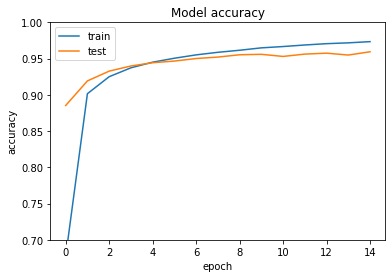

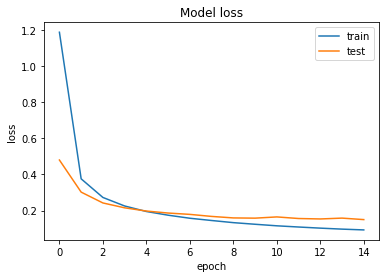

In [ ]:
# trying different number of hidden layer
# 3 hidden layer 

model = models.Sequential()

# 3 hidden layer
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()